In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hydra import compose, initialize

with initialize(config_path="./configs", version_base=None):
    cfg = compose(config_name="config")
    cfg.working_path = os.getcwd()

species_of_interest = [
    "H",
    "H2",
    "O",
    "C",
    "N",
    "CL",
    "E_minus",
    "CO",
    "MG",
    "#C",
    "H2O",
    "SI",
]
physical_params = {
    "Density": "n_H / cm^3",
    "gasTemp": "K",
    "Av": "mag",
    "Radfield": "habing",
}

In [4]:
df = pd.read_hdf(cfg.dataset.dataset_path, key="val")
df

,Index,Model,Time,Density,Radfield,Av,gasTemp,#C,#C2,#C2H,...,SIH5+,SIO,SIO+,SIOH+,SIS,SIS+,SO,SO+,SO2,SO2+
0,297,1.0,0.0,2.469464e+06,0.000100,125.946977,13.316765,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
1,298,1.0,92.9,2.469518e+06,0.000881,125.904971,37.272751,2.812095e-13,6.059033e-11,1.926521e-15,...,3.900416e-17,3.845897e-07,1.553641e-13,3.256152e-10,4.498814e-11,3.839608e-17,1.557318e-13,1.535118e-14,1.126770e-17,4.949724e-26
2,299,1.0,185.8,2.469682e+06,0.002420,122.553760,37.273227,1.329156e-13,2.803169e-10,2.959879e-13,...,2.443432e-13,5.779961e-07,1.468122e-14,1.820146e-09,1.442375e-10,5.265557e-18,1.121113e-12,3.376560e-12,1.723016e-17,4.190085e-26
3,300,1.0,278.7,2.469956e+06,0.004226,127.753742,37.274022,1.779863e-13,3.408037e-10,4.668192e-13,...,2.951430e-13,5.895289e-07,8.397175e-15,2.892088e-09,1.890492e-10,6.991561e-18,1.889689e-12,3.772408e-12,2.899298e-17,6.768904e-26
4,301,1.0,371.6,2.470337e+06,0.006226,125.487153,37.275133,2.385164e-13,4.144190e-10,7.082638e-13,...,2.954123e-13,5.804833e-07,5.384105e-15,3.500323e-09,2.113139e-10,9.363274e-18,2.328770e-12,3.793846e-12,3.572107e-17,8.830020e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741010,2963164,9976.0,27126.8,9.237469e+04,0.006953,9.428154,28.282474,1.886483e-14,9.725270e-10,1.510090e-11,...,6.487243e-14,2.772149e-08,2.155037e-16,1.951907e-10,2.228699e-12,9.428030e-15,5.364479e-12,1.688304e-11,1.811661e-14,1.439812e-20
741011,2963165,9976.0,27219.7,9.175306e+04,0.004664,1.104509,28.256330,1.810282e-14,9.718922e-10,1.511864e-11,...,6.510020e-14,2.765537e-08,2.167818e-16,1.942391e-10,2.202386e-12,9.359301e-15,5.382553e-12,1.687257e-11,1.804971e-14,1.445377e-20
741012,2963166,9976.0,27312.6,9.113814e+04,0.011724,1.447462,28.230112,2.093975e-14,9.712548e-10,1.514163e-11,...,6.436334e-14,2.772882e-08,3.556555e-16,1.958754e-10,2.179206e-12,9.261472e-15,5.394813e-12,1.786260e-11,1.797066e-14,1.475120e-20
741013,2963167,9976.0,27405.5,9.052982e+04,0.006832,4.140581,28.204059,2.216048e-14,9.706131e-10,1.517565e-11,...,6.345617e-14,2.787131e-08,3.968636e-16,1.967089e-10,2.158419e-12,9.174533e-15,5.410565e-12,1.897020e-11,1.789298e-14,1.469359e-20


In [6]:
for key in physical_params.keys():
    print(f"{key} | Min: {df[key].min()} | Max: {df[key].max()}")

Density | Min: 68481.87285239411 | Max: 1237955481.252346
gasTemp | Min: 13.316758174233899 | Max: 132.77355477061974
Av | Min: 0.7575624106242899 | Max: 6913.072734868995
Radfield | Min: 0.0001 | Max: 4.4613610209953265


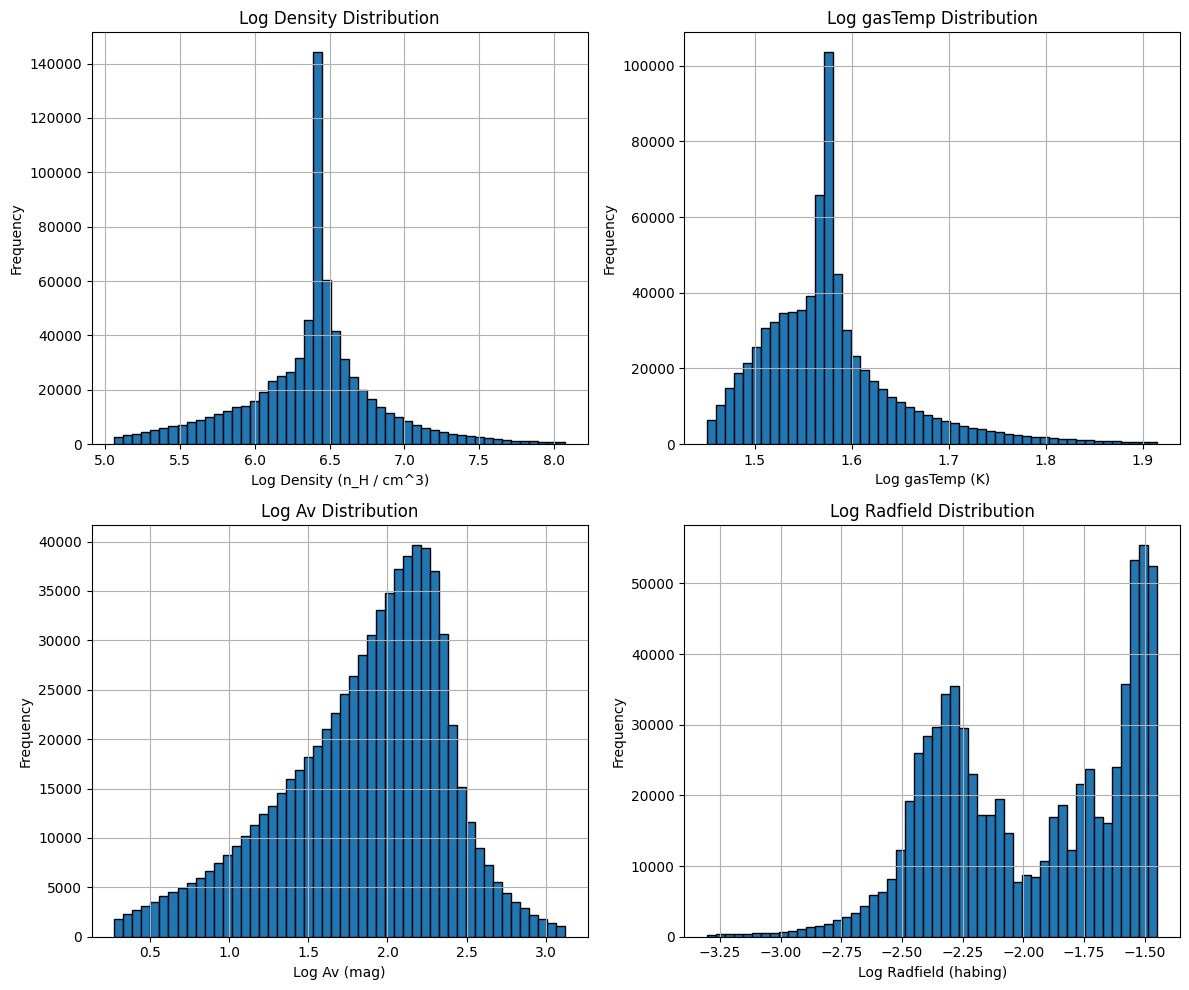


Descriptive stats for Log Density (n_H / cm^3):
count    733603.000000
mean          6.372048
std           0.453057
min           5.061432
25%           6.164237
50%           6.403145
75%           6.566772
max           8.073353
Name: Density, dtype: float64

Descriptive stats for Log gasTemp (K):
count    733603.000000
mean          1.576855
std           0.071372
min           1.450719
25%           1.531144
50%           1.571397
75%           1.599612
max           1.915009
Name: gasTemp, dtype: float64

Descriptive stats for Log Av (mag):
count    733603.000000
mean          1.848424
std           0.524989
min           0.275080
25%           1.528797
50%           1.945083
75%           2.226041
max           3.121078
Name: Av, dtype: float64

Descriptive stats for Log Radfield (habing):
count    733603.000000
mean         -1.978666
std           0.388833
min          -3.303200
25%          -2.311891
50%          -1.968600
75%          -1.581928
max          -1.447010
Name: R

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (column, unit) in enumerate(physical_params.items()):
    col_data = np.log10(df[column].dropna())
    lower = col_data.quantile(0.005)
    upper = col_data.quantile(0.995)

    filtered_data = col_data[(col_data >= lower) & (col_data <= upper)]

    axes[idx].hist(filtered_data, bins=50, edgecolor="k")
    axes[idx].set_title(f"Log {column} Distribution")
    axes[idx].set_xlabel(f"Log {column} ({unit})")
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

for column, unit in physical_params.items():
    col_data = np.log10(df[column].dropna())
    lower = col_data.quantile(0.005)
    upper = col_data.quantile(0.995)

    filtered_data = col_data[(col_data >= lower) & (col_data <= upper)]

    print(f"\nDescriptive stats for Log {column} ({unit}):")
    print(filtered_data.describe())

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


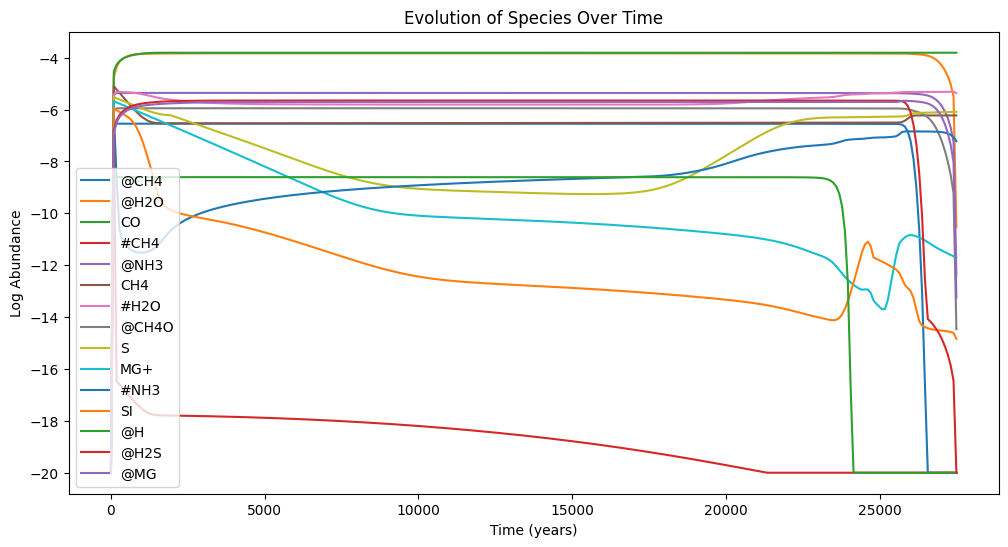

In [9]:
df_tracer = df[df["Model"] == 4]

df_diff = np.log10(df_tracer).diff()

col_variation = df_diff.std()

most_variable_cols = col_variation.nlargest(15)

species_of_interest = most_variable_cols.index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))

for species in species_of_interest:
    if species in df_tracer.columns:
        log_abundance = np.log10(df_tracer[species].replace(0, np.nan))
        log_abundance = np.maximum(log_abundance, -20)
        ax.plot(df_tracer["Time"], log_abundance, label=species)

ax.set_xlabel("Time (years)")
ax.set_ylabel("Log Abundance")
ax.set_title("Evolution of Species Over Time")
ax.legend()
plt.show()

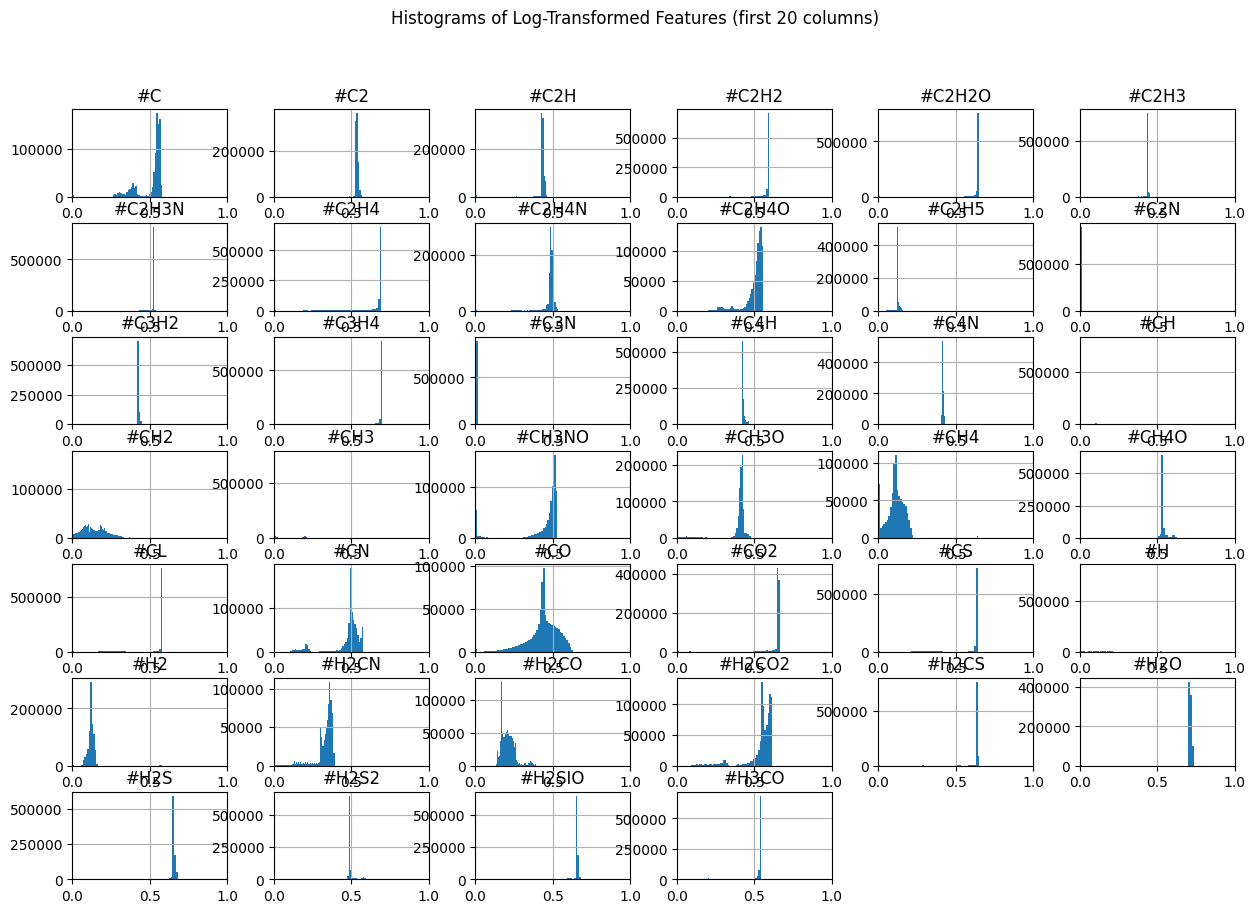

In [22]:
log_df = (np.log10(df[GeneralConfig.species]) + 20) / 20
log_df = log_df.clip(0, 1)

subset_cols = log_df.columns[:40]
log_df[subset_cols].hist(bins=60, figsize=(15, 10))
plt.suptitle("Histograms of Log-Transformed Features (first 20 columns)")
for ax in plt.gcf().axes:
    ax.set_xlim(0, 1)
plt.show()